<a href="https://colab.research.google.com/github/melanieyes/stock-price-prediction/blob/master/stock-price-prediction-nasdaq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

nasdaq


In [3]:
!git clone https://github.com/melanieyes/stock-price-prediction.git

Cloning into 'stock-price-prediction'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 30 (delta 0), reused 30 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (30/30), 2.46 MiB | 5.70 MiB/s, done.


In [4]:
%cd stock-price-prediction

/content/stock-price-prediction


In [5]:
!ls

hose  nasdaq


In [6]:
!pip install keras

In [14]:
from datetime import datetime
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM
from keras.layers import Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [18]:
window_size = 120
prediction_day = 7

def get_data(file_location):
    # Load the data
    df = pd.read_csv(file_location)
    X_data = []
    y_data = []

    #Only get adjusted open price
    for i in range(1, len(df) - window_size - prediction_day - 1):
        data_feature = []
        data_label = []
        first = df.iloc[i, 4]

        # Get a window_size time frame for data feature
        for j in range(window_size):
            data_feature.append(df.iloc[i + j, 4])

        # Predict price in 7 days
        for j in range(prediction_day):
            data_label.append(df.iloc[i + window_size + j, 4])

        # Append new data sample (feature and label) to X_data and y_data
        X_data.append(np.array(data_feature).reshape(window_size, 1))
        y_data.append(np.array(data_label))

    # Split data into train, val and test. Note that 'shuffle=False' due to time-series data.
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle=False)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

    # Convert from lists to Numpy arrays for reshaping purpose
    X_train = np.array(X_train)
    X_val = np.array(X_val)
    X_test = np.array(X_test)
    y_train = np.array(y_train)
    y_val = np.array(y_val)
    y_test = np.array(y_test)

    # Reshape the numpy array to fit the neural network input shape requirement
    X_train = X_train.reshape(X_train.shape[0], window_size, 1)
    X_val = X_val.reshape(X_val.shape[0], window_size, 1)
    X_test = X_test.reshape(X_test.shape[0], window_size, 1)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [21]:
import os
from glob import glob
nasdaq_path = './nasdaq'
csv_files = glob(os.path.join(nasdaq_path, '*.csv'))

#create arrays to store data into
X_train_nas = np.empty((0, window_size, 1))
X_val_nas = np.empty((0, window_size, 1))
X_test_nas = np.empty((0, window_size, 1))
y_train_nas = np.empty((0,prediction_day))
y_val_nas = np.empty((0, prediction_day))
y_test_nas = np.empty((0, prediction_day))

for file in csv_files:
    # Process each file to get train, val, and test splits
    X_train, X_val, X_test, y_train, y_val, y_test = get_data(file)

    # Stack the data into the combined arrays
    X_train_nas = np.vstack((X_train_nas, X_train))
    X_val_nas = np.vstack((X_val_nas, X_val))
    X_test_nas = np.vstack((X_test_nas, X_test))
    y_train_nas = np.vstack((y_train_nas, y_train))
    y_val_nas = np.vstack((y_val_nas, y_val))
    y_test_nas = np.vstack((y_test_nas, y_test))

    print(f"Processed: {file}")

    data = pd.read_csv(file)
    print(data.head())

Processed: ./nasdaq/ASML.csv
         Date       Low      Open    Volume      High     Close  \
0  15-03-1995  1.828125  1.875000  92646400  2.144531  2.109375   
1  16-03-1995  2.226563  2.320313  22867200  2.390625  2.320313   
2  17-03-1995  2.226563  2.332031  17163733  2.332031  2.238281   
3  20-03-1995  2.179688  2.226563   7141333  2.238281  2.226563   
4  21-03-1995  2.203125  2.226563   8198400  2.355469  2.332031   

   Adjusted Close  
0        1.322342  
1        1.454577  
2        1.403152  
3        1.395806  
4        1.461923  
Processed: ./nasdaq/NFLX.csv
         Date       Low      Open     Volume      High     Close  \
0  23-05-2002  1.145714  1.156429  104790000  1.242857  1.196429   
1  24-05-2002  1.197143  1.214286   11104800  1.225000  1.210000   
2  28-05-2002  1.157143  1.213571    6609400  1.232143  1.157143   
3  29-05-2002  1.085714  1.164286    6757800  1.164286  1.103571   
4  30-05-2002  1.071429  1.107857   10154200  1.107857  1.071429   

   Adjuste

In [22]:
# Path to the directory containing CSV files
nasdaq_path = './nasdaq'
csv_files = glob(f"{nasdaq_path}/*.csv")

# Loop through each file and display it in table format
for file in csv_files:
    data = pd.read_csv(file)  # Read the CSV file into a DataFrame

    #drop "Date" column for the shake of pretiness
    if 'Date' in data.columns: # Corrected indentation here
        data = data.drop(columns=['Date'])

    print(f"Table for {file}:")
    display(data.head())  # Displays the first few rows as a table

Table for ./nasdaq/ASML.csv:


,Low,Open,Volume,High,Close,Adjusted Close
0,1.828125,1.875000,92646400,2.144531,2.109375,1.322342
1,2.226563,2.320313,22867200,2.390625,2.320313,1.454577
2,2.226563,2.332031,17163733,2.332031,2.238281,1.403152
3,2.179688,2.226563,7141333,2.238281,2.226563,1.395806
4,2.203125,2.226563,8198400,2.355469,2.332031,1.461923


Table for ./nasdaq/NFLX.csv:


,Low,Open,Volume,High,Close,Adjusted Close
0,1.145714,1.156429,104790000,1.242857,1.196429,1.196429
1,1.197143,1.214286,11104800,1.225000,1.210000,1.210000
2,1.157143,1.213571,6609400,1.232143,1.157143,1.157143
3,1.085714,1.164286,6757800,1.164286,1.103571,1.103571
4,1.071429,1.107857,10154200,1.107857,1.071429,1.071429


Table for ./nasdaq/INTC.csv:


,Low,Open,Volume,High,Close,Adjusted Close
0,0.325521,0.325521,10924800,0.330729,0.325521,0.198333
1,0.322917,0.325521,17068800,0.328125,0.322917,0.196747
2,0.330729,0.330729,18508800,0.335938,0.330729,0.201507
3,0.329427,0.330729,11174400,0.334635,0.329427,0.200713
4,0.317708,0.322917,12172800,0.322917,0.317708,0.193573


Table for ./nasdaq/CSCO.csv:


,Low,Open,Volume,High,Close,Adjusted Close
0,0.073785,0.0,940636800,0.079861,0.077257,0.054863
1,0.074653,0.0,151862400,0.079861,0.079861,0.056712
2,0.075521,0.0,70531200,0.078993,0.078125,0.055479
3,0.078993,0.0,45216000,0.081597,0.078993,0.056095
4,0.078125,0.0,44697600,0.079861,0.078559,0.055787


Table for ./nasdaq/AAPL.csv:


,Low,Open,Volume,High,Close,Adjusted Close
0,0.128348,0.128348,469033600,0.128906,0.128348,0.099874
1,0.121652,0.122210,175884800,0.122210,0.121652,0.094663
2,0.112723,0.113281,105728000,0.113281,0.112723,0.087715
3,0.115513,0.115513,86441600,0.116071,0.115513,0.089886
4,0.118862,0.118862,73449600,0.119420,0.118862,0.092492


Table for ./nasdaq/AMZN.csv:


,Low,Open,Volume,High,Close,Adjusted Close
0,0.096354,0.121875,1443120000,0.125000,0.097917,0.097917
1,0.085417,0.098438,294000000,0.098958,0.086458,0.086458
2,0.081250,0.088021,122136000,0.088542,0.085417,0.085417
3,0.081771,0.086458,109344000,0.087500,0.081771,0.081771
4,0.068750,0.081771,377064000,0.082292,0.071354,0.071354


Table for ./nasdaq/NVDA.csv:


,Low,Open,Volume,High,Close,Adjusted Close
0,0.388021,0.437500,271468800,0.488281,0.410156,0.376886
1,0.410156,0.442708,51048000,0.458333,0.453125,0.416370
2,0.411458,0.458333,34320000,0.467448,0.417969,0.384065
3,0.395833,0.419271,24436800,0.429688,0.416667,0.382869
4,0.412760,0.416667,22752000,0.419271,0.415365,0.381673


Table for ./nasdaq/ADBE.csv:


,Low,Open,Volume,High,Close,Adjusted Close
0,0.210938,0.0,18899200,0.218750,0.210938,0.198057
1,0.222656,0.0,4160000,0.230469,0.222656,0.209060
2,0.218750,0.0,4332800,0.222656,0.218750,0.205392
3,0.210938,0.0,2828800,0.218750,0.210938,0.198057
4,0.214844,0.0,2060800,0.218750,0.214844,0.201725


Table for ./nasdaq/ORLY.csv:


,Low,Open,Volume,High,Close,Adjusted Close
0,2.34375,2.43750,16484800,2.43750,2.40625,2.40625
1,2.34375,2.37500,3334400,2.40625,2.34375,2.34375
2,2.28125,2.37500,2046400,2.37500,2.31250,2.31250
3,2.28125,2.34375,897600,2.34375,2.28125,2.28125
4,2.28125,2.28125,844800,2.34375,2.31250,2.31250


Table for ./nasdaq/MSFT.csv:


,Low,Open,Volume,High,Close,Adjusted Close
0,0.088542,0.088542,1031788800,0.101563,0.097222,0.061608
1,0.097222,0.097222,308160000,0.102431,0.100694,0.063809
2,0.100694,0.100694,133171200,0.103299,0.102431,0.064909
3,0.098958,0.102431,67766400,0.103299,0.099826,0.063258
4,0.097222,0.099826,47894400,0.100694,0.098090,0.062158


In [23]:
# Dictionary to store the highest values for each stock
highest_prices = []

# Loop through each file
for file in csv_files:
    data = pd.read_csv(file)  # Read the CSV file into a DataFrame

    # Drop the 'Date' column if it exists
    if 'Date' in data.columns:
        data = data.drop(columns=['Date'])

    # Get the highest Close, Open, and Volume values
    stock_name = file.split('/')[-1].replace('.csv', '')  # Extract stock name from the file name
    highest_close = data['Close'].max()
    highest_open = data['Open'].max()
    highest_volume = data['Volume'].max()

    # Append the results to the list
    highest_prices.append({
        'Stock': stock_name,
        'Highest Close': highest_close,
        'Highest Open': highest_open,
        'Highest Volume': highest_volume
    })

# Convert the results into a DataFrame for a tabular display
highest_prices_df = pd.DataFrame(highest_prices)

# Display the results
print("Highest Close, Open, and Volume Prices for 10 Stocks:")
display(highest_prices_df)


Highest Close, Open, and Volume Prices for 10 Stocks:


,Stock,Highest Close,Highest Open,Highest Volume
0,ASML,889.330017,886.989990,92646400
1,NFLX,691.690002,692.349976,323414000
2,INTC,74.875000,75.625000,567708800
3,CSCO,80.062500,81.437500,940636800
4,AAPL,182.009995,182.630005,7421640800
5,AMZN,186.570496,187.199997,2086584000
6,NVDA,333.760010,335.170013,923085600
7,ADBE,688.369995,696.280029,175513600
8,ORLY,864.539978,869.059998,27860200
9,MSFT,343.109985,344.619995,1031788800


In [24]:
# MinMax normalize the training data: x=(x-min(x)/(max(x)-min(x))
X_train_norm_nas = X_train_nas.copy()
y_train_norm_nas = y_train_nas.copy()
for i in range(0, len(X_train_nas)):
    min_feature_nas = np.min(X_train_nas[i])
    max_feature_nas = np.max(X_train_nas[i])
    X_train_norm_nas[i] = (X_train_nas[i] - min_feature_nas) / (max_feature_nas - min_feature_nas)
    y_train_norm_nas[i] = (y_train_nas[i] - min_feature_nas) / (max_feature_nas - min_feature_nas)

# MinMax normalize the validation data: x=(x-min(x)/(max(x)-min(x))
X_val_norm_nas = X_val_nas.copy()
y_val_norm_nas = y_val_nas.copy()
for i in range(0, len(X_val_nas)):
    min_feature_nas = np.min(X_val_nas[i])
    max_feature_nas = np.max(X_val_nas[i])
    X_val_norm_nas[i] = (X_val_nas[i] - min_feature_nas) / (max_feature_nas - min_feature_nas)
    y_val_norm_nas[i] = (y_val_nas[i] - min_feature_nas) / (max_feature_nas - min_feature_nas)

# MinMax normalize the test data: norm_x = (x-min(x) / (max(x) - min(x))
X_test_norm_nas = X_test_nas.copy()
y_test_norm_nas = y_test_nas.copy()
for i in range(0, len(X_test_nas)):
    min_feature_nas = np.min(X_test_nas[i])
    max_feature_nas = np.max(X_test_nas[i])
    X_test_norm_nas[i] = (X_test_nas[i] - min_feature_nas) / (max_feature_nas - min_feature_nas)
    y_test_norm_nas[i] = (y_test_nas[i] - min_feature_nas) / (max_feature_nas - min_feature_nas)

In [25]:
#Build the model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(window_size, 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=64))
model.add(Dropout(0.2))

model.add(Dense(units=prediction_day))
#Compile the model
model.compile(optimizer= tf.keras.optimizers.Adam(), loss='mse', metrics=['mse'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
# splitting time series data for cross-validatoin
cross_validation_split = TimeSeriesSplit(n_splits=5)
mse_scores_nas = []

#Run cross validation
for train_index, test_index in cross_validation_split.split(X_train_norm_nas):
    # Split the data into training and testing sets
    X_train_fold, X_test_fold = X_train_norm_nas[train_index], X_train_norm_nas[test_index]
    y_train_fold, y_test_fold = y_train_norm_nas[train_index], y_train_norm_nas[test_index]

    model.fit(X_train_fold, y_train_fold, epochs=5, batch_size=128)

    # Make predictions on the testing set
    y_pred_fold = model.predict(X_test_fold)

    # Calculate MSE and store it
    mse = mean_squared_error(y_test_fold, y_pred_fold)
    mse_scores_nas.append(mse)
avg_mse_nas = np.mean(mse_scores_nas)
print("Average MSE:" + str(avg_mse_nas))
print("Mse in 5 folds: " + str(mse_scores_nas))

Epoch 1/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.1771 - mse: 0.1771
Epoch 2/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0526 - mse: 0.0526
Epoch 3/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0461 - mse: 0.0461
Epoch 4/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0403 - mse: 0.0403
Epoch 5/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0362 - mse: 0.0362
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Epoch 1/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0334 - mse: 0.0334
Epoch 2/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0302 - mse: 0.0302
Epoch 3/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0282 - mse: 0.0282
Epoch 4/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0276 - mse: 0.0276
Epoch 5/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0255 - mse: 0.0255
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Epoch 1/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0252 - mse: 0.0252
Epoch 2/5
198/198 ━━━━━━━━━━━━━━━━━━━

In [29]:
#Train model

history_nas = model.fit(X_train_norm_nas, y_train_norm_nas, validation_data=(X_val_norm_nas,y_val_norm_nas), epochs=10, batch_size=256)

Epoch 1/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0231 - val_mse: 0.0231
Epoch 2/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 3/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0231 - val_mse: 0.0231
Epoch 4/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0231 - val_mse: 0.0231
Epoch 5/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0231 - val_mse: 0.0231
Epoch 6/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0231 - val_mse: 0.0231
Epoch 7/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - loss: 0.0217 - mse: 0.0217 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 8/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0231 - val_mse: 0.0231
Epoch 9/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 6s 

In [31]:
#Predicting the test data
y_pred_norm_nas = model.predict(X_test_norm_nas)
print("MSE on the test set: ", mean_squared_error(y_pred_norm_nas, y_test_norm_nas))

493/493 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step
MSE on the test set:  0.021517102305184468


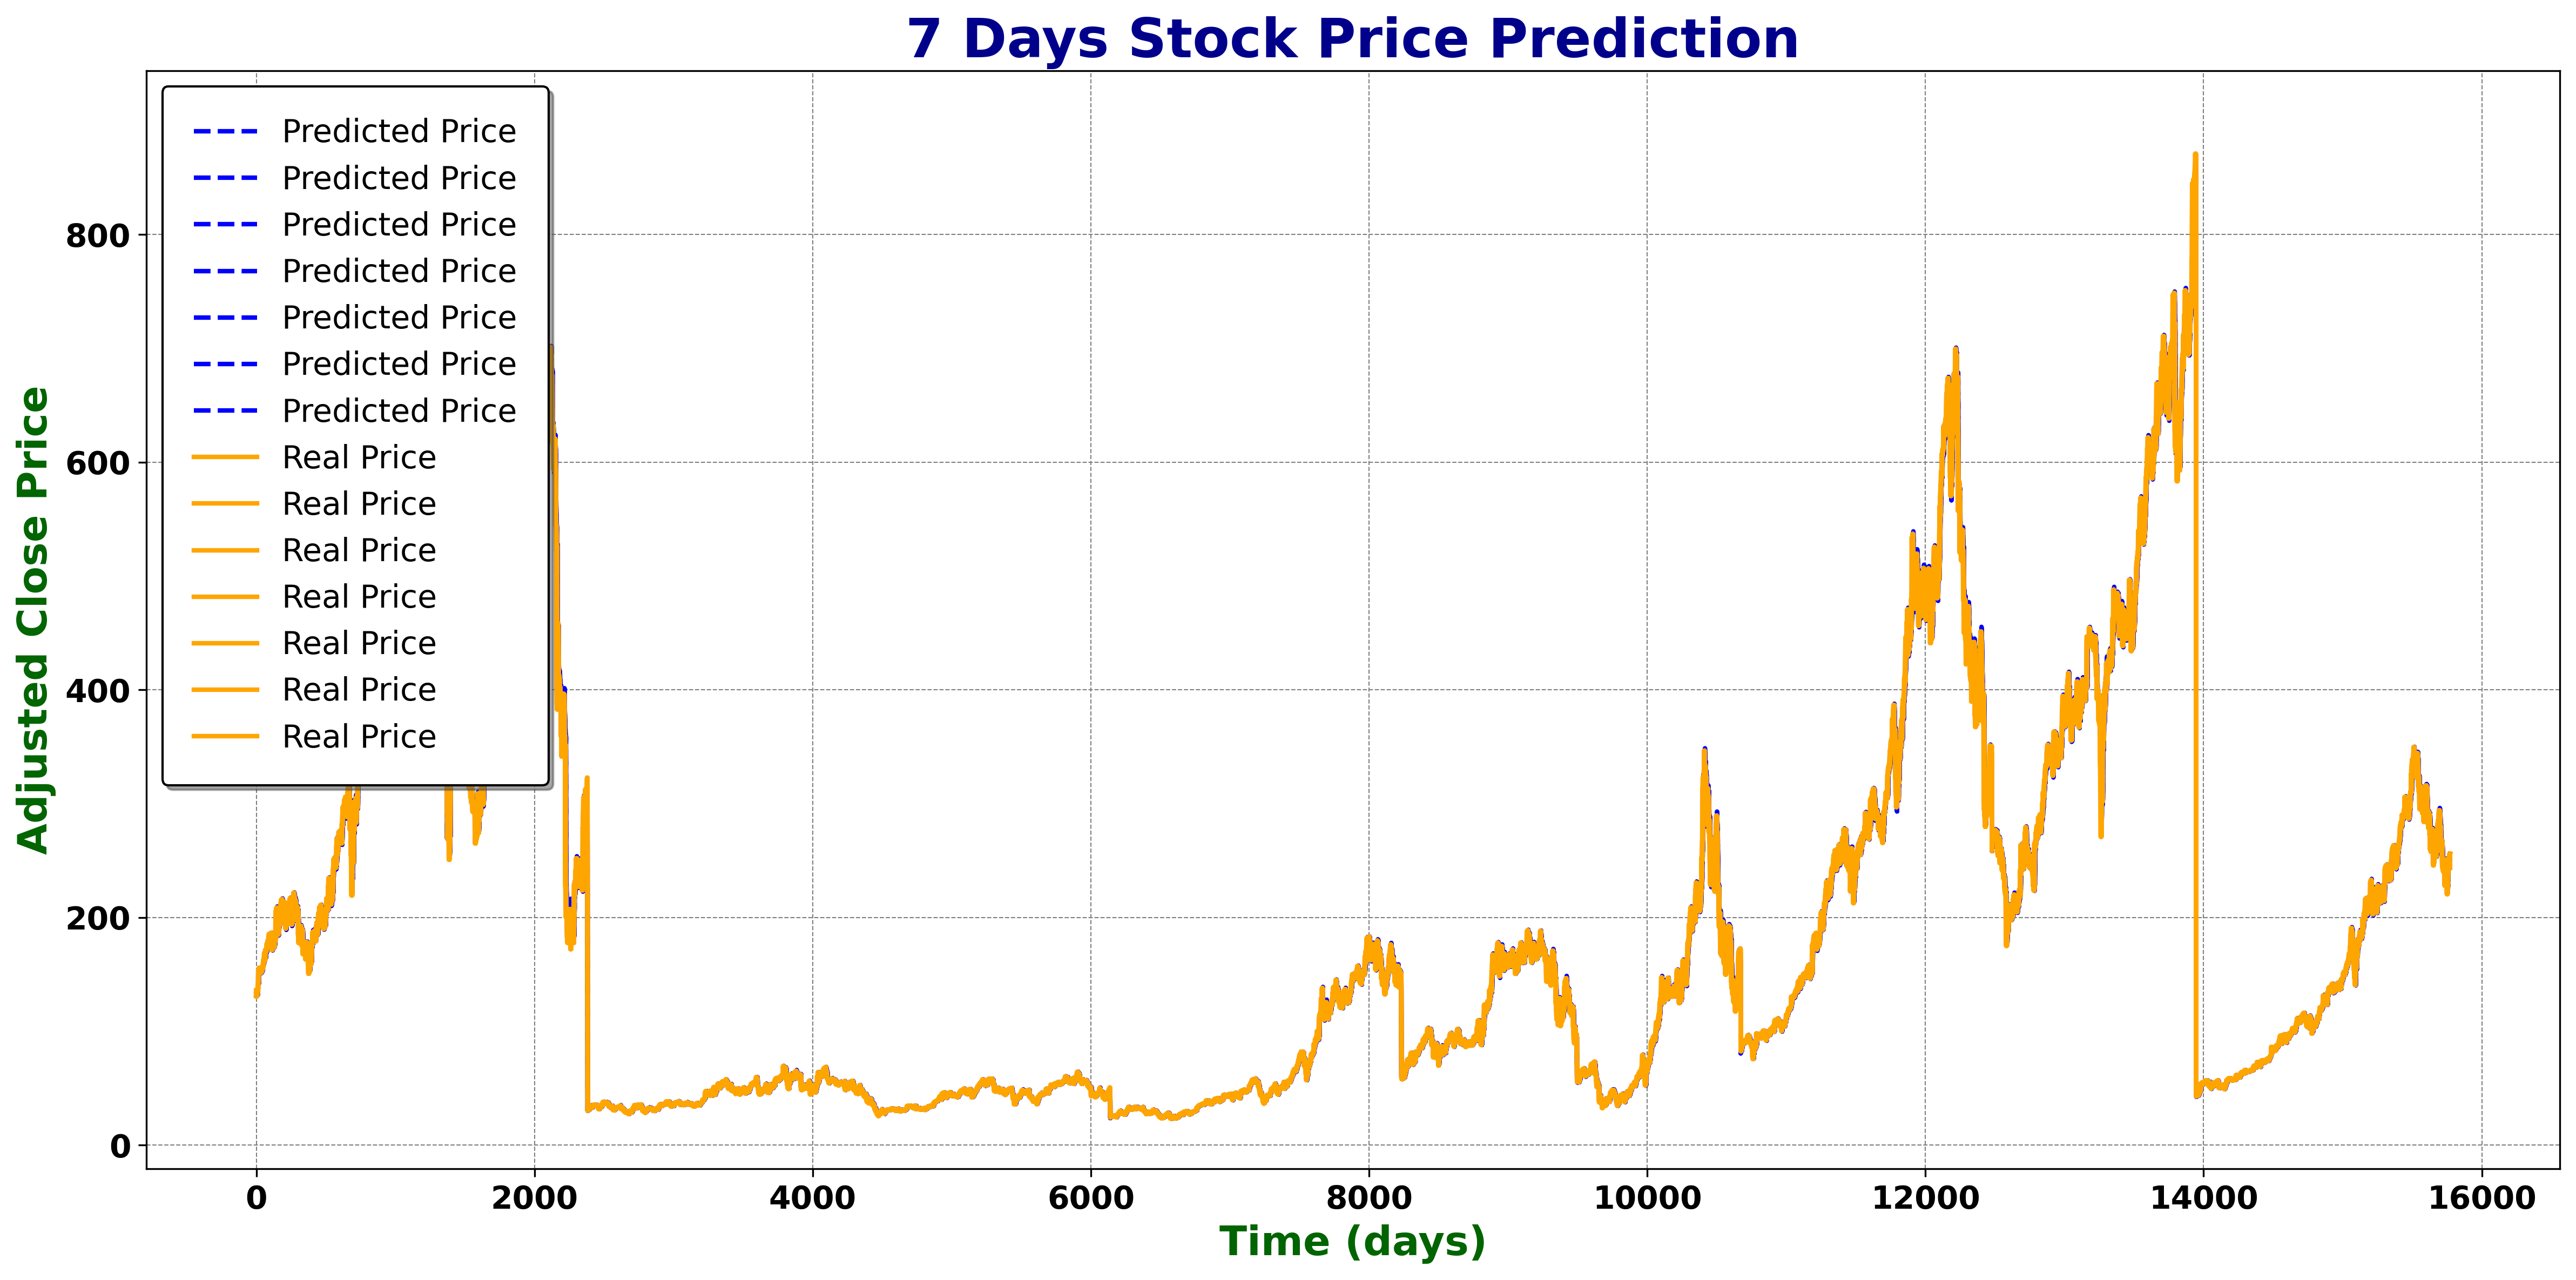

In [32]:
# Convert the result back to stock price (i.e., de-normalization) for visualization purpose
# norm_x * (max(x) - min(x)) + min(x))
y_pred_denorm_nas = y_pred_norm_nas
for i in range(0, len(y_pred_denorm_nas)):
    min_feature_nas = np.min(X_test_nas[i])
    max_feature_nas = np.max(X_test_nas[i])
    y_pred_denorm_nas[i] = y_pred_norm_nas[i] * (max_feature_nas - min_feature_nas) + min_feature_nas
# Visualize preditec stock price versus real stock price
plt.figure(figsize=(16, 8), dpi=300)
plt.plot(y_pred_denorm_nas, label='Predicted Price', linestyle='--', linewidth=2, color='blue')
plt.plot(y_test_nas, label='Real Price', linestyle='-', linewidth=2, color='orange')
plt.title('7 Days Stock Price Prediction', fontsize=24, fontweight='bold', color='darkblue')
plt.xlabel('Time (days)', fontsize=18, fontweight='bold', color='darkgreen')
plt.ylabel('Adjusted Close Price', fontsize=18, fontweight='bold', color='darkgreen')
plt.legend(fontsize=14, loc='upper left', frameon=True, shadow=True, borderpad=1, edgecolor='black')
plt.grid(visible=True, linestyle='--', linewidth=0.5, color='gray')
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()